In [1]:
#Подключение необходимых библиотек
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 задание

#### Вычисление функции ошибок

In [39]:
#Вычисление q и функции ошибок в определённой точки
def q(x, n):
    return -1 * (2 * n + 1) * (x ** 2) / (n + 1) / (2 * n + 3)

def erf(x, eps):
    s = 0
    n = 0
    a = x
    while np.absolute(a) >= eps:
        s += a
        a *= q(x, n)
        n += 1
    return s * 2 / np.sqrt(np.pi)

#Вычисление функции ошибок на отрезке с равноудалёнными точками
def ERF(x_list, eps):
    res = []
    for x in x_list:
        res.append(erf(x, eps))
    return np.array(res)

#Cоздание значений точек отрезка
a=0
b=3
number_of_steps=15
eps = 0.000001
step=(b-a)/number_of_steps
X=[]
for x in np.arange(a,b+step,step):   
    X.append(round(x,2))

Y = ERF(X, eps)

Используем функцию ошибок на заданном отрезке. Lемонстрируем получившиеся значения и строим график функции ошибок

0.0  :  0.0
0.2  :  0.2227029304401949
0.4  :  0.428392390107679
0.6  :  0.6038559401457361
0.8  :  0.7421014550168195
1.0  :  0.8427009429420883
1.2  :  0.9103133702966624
1.4  :  0.9522847480723241
1.6  :  0.9763480639682842
1.8  :  0.9890901343536931
2.0  :  0.9953217200763728
2.2  :  0.9981373782937999
2.4  :  0.999312044850305
2.6  :  0.9997635470749018
2.8  :  0.9999254026722089
3.0  :  0.9999773727814576


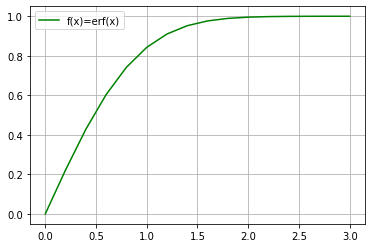

In [40]:
for i in range(0,len(X)):
    print(X[i],' : ',Y[i])


sns.lineplot(x=X, y=Y, color="g", label = "f(x)=erf(x)")
plt.legend()
plt.grid(True)

# 2 задание
### Построение интерполяционного полинома

Создание списка для интерполяции

In [ ]:
def ipl(x, nodes, eps):
    l = 0
    for xi in nodes:
        li = 1
        for xj in nodes:
            if xj != xi:
                li *= (x - xj) / (xi - xj)
        l += erf(xi, eps) * li
    return l

def IPL(x_list, nodes, eps):
    res = []
    for xi in x_list:
        res.append(ipl(xi, nodes, eps))
    return np.array(res)

#Создаем точки для интерполирования
n_ipl=30
step=(b-a)/n_ipl
x_ipl=[]
for x in np.arange(a,b+step,step):   
    x_ipl.append(round(x,3))

#Вычисление значения полинома Лагранжа в конкретной точке
y_ipl = IPL(x_ipl, X, eps)

def make_list(n, n_ipl):
    step=(b-a)/n
    X_plot=[]
    for x in np.arange(a,b+step,step):   
        X_plot.append(round(x,5))
    step_ipl=(b-a)/n_ipl
    x_plot=[]
    for x in np.arange(a,b+step_ipl,step_ipl):   
        x_plot.append(round(x,5))
#     print(X_plot)
#     print(x_plot)
    return X_plot, x_plot    

#Стоим график, отображающий размер погрешности

def plot(n, n_ipl):
    X_plot, x_plot = make_list(n, n_ipl)  
#     print(X_plot)
#     print(x_plot)
    sns.lineplot(x=x_plot, y=abs(ERF(x_plot,eps) - IPL(x_plot, X_plot, eps)),color = "g")
    plt.grid(True)

Проверяем основное свойство интерполяционного полинома: функция $L_n (x_i)$ должна совпадать с заданной $F(x_i)$ в некотором наборе точек
${x_i , i=(1,n)}$ из отрезка $[a,b]$.


In [ ]:
d1 = {"x":x_ipl,"Erf(x)":ERF(x_ipl,eps),"IPLagr(x)":IPL(x_ipl, X, eps),
     "Погрешность в узлах интерполяции":np.abs(ERF(x_ipl,eps)-IPL(x_ipl, X, eps))}
df1 = pd.DataFrame(d1)
df1


Как мы видим, погрешность в узлах осталась прежней, однако значения между ними имеют погрешность. Убедившись в правильности вычисления интерполяционного полинома в форме Лагранжа.
Заметим, что на концах отрезка погрешность больше, чем посередине, изучим данную особенность более внимательно.

Стоим график, отображающий размер погрешности по таблице выше

In [ ]:
plot(15,31)

Строим графики, чтобы усмотреть закономерность

In [ ]:
plot(6,31)

In [ ]:
plot(12,31)

In [ ]:
plot(25,31)

При совпадении узлов интерполяции и точек все должно быть = 0

In [ ]:
plot(31,31)

In [ ]:
plot(36,31)

Абсолютная погрешность принимает целые значения начиная с 37.

In [ ]:
plot(40,31)

Находим максимальную погрешность при заданных значениях

In [ ]:
def maximum(n, n_ipl):
    X_plot, x_plot = make_list(n, n_ipl) 
    return max(abs(ERF(x_plot,eps)-IPL(x_plot, X_plot, eps)))

max_error_list = []
for n in range(2,38):
    max_error_list.append(maximum(n, 31))
sns.lineplot(x=range(2,38), y=max_error_list, color = "g")
plt.title("График максимальной погрешности")
plt.axis([5, 40, 0, 2])
plt.grid(True)

С увеличением числа равномерно отстоящих узлов интерполяции увеличивается точность вычисления полинома, но только до определенного момента, после которого точность начинает резко падать.  
Вблизи концов рассматриваемого отрезка погрешность резко увеличивается, а в середине отрезка погрешность придерживается минимальных значений.

# 2.1 задание 
### Минимизация погрешности интерполяции
### Интерполяционный полином с узлами-корнями полинома Чебышева


Считаем корни Чебышева

In [ ]:
def PChNode(a,b,n):
    result_list = []
    for i in reversed(range(0,n+1)):
        result_list.append((a+b)/2 + (b-a)/2 * np.cos((2 * i + 1) * np.pi / 2 / (n + 1)))
    return result_list

In [ ]:
PChNode(a,b,4)

In [ ]:
def make_list_CH(n, n_ipl):
    x_plot=[]
    step=(b-a)/n_ipl
    for x in np.arange(a,b+step,step):   
        x_plot.append(round(x,10))
    X_plot = PChNode(a,b,n)
    return X_plot, x_plot

def plot_CH(n, n_ipl):
    X_plot, x_plot = make_list_CH(n, n_ipl)  
    sns.lineplot(x=x_plot, y=abs(ERF(x_plot,eps) - IPL(x_plot, X_plot, eps)), color = 'g')
    plt.grid(True)

In [ ]:
plot_CH(25,31)

In [ ]:
plot_CH(705,21)

Смитаем максимальное значение погрешности при использовании корней Чебышева

In [ ]:
def maximum_CH(n, n_ipl):
    X_plot, x_plot = make_list_CH(n, n_ipl)  
    return max(abs(ERF(x_plot,eps)-IPL(x_plot, X_plot, eps)))

max_error_list_Cheb = []
for n in range(5,100):
    max_error_list_Cheb.append(maximum_CH(n, 20))
sns.lineplot(x=range(5,100), y=max_error_list_Cheb, color = "g")
plt.grid(True)

# 3 Задание
### Приближённое вычисление интегралов

В данном задании нужно вычислить интеграл $$erf(x) = \frac{2}{\sqrt\pi} \int\limits_0^x e^{-t^2}\,dt$$ с помощью основных квадратурных формул Ньютона – Котеса.

Зададим функцию, вычисляющюю значение подынтегрального выражения:

In [2]:
def fi(t):
    return np.e ** -(t ** 2)

#### Формула левых прямоугольников

In [3]:
def left(x, eps):
    n = 1
    s0 = 0
    s1 = x * fi(0)
    while np.absolute(s1 - s0) >= eps:
        n *= 2
        s0 = s1
        s1 = 0
        z = 0
        h = x / n
        for i in range(n):
            s1 += h * fi(z)
            z += h
    return s0 * 2 / np.sqrt(np.pi), n

In [4]:
print("Значение интеграла и количество итераций: ", left(3,0.01))

Значение интеграла и количество итераций:  (1.0131994327592089, 256)


#### Формула правых прямоугольников

In [5]:
def right(x, eps):
    n = 1
    s0 = 0
    s1 = x * fi(0)
    while np.absolute(s1 - s0) >= eps:
        n *= 2
        s0 = s1
        s1 = 0
        h = x / n
        z=h
        for i in range(1,n+1):
            s1 += h * fi(z)
            z += h
    return s0 * 2 / np.sqrt(np.pi), n

In [6]:
print("Значение интеграла и количество итераций: ", right(3,0.01))

Значение интеграла и количество итераций:  (0.9867563097738128, 256)


#### Формула центральных прямоугольников

In [7]:
def center(x, eps):
    n = 1
    s0 = 0
    s1 = x * fi(x / 2)
    while np.absolute(s1 - s0) >= eps:
        n *= 2
        s0 = s1
        s1 = 0
        z = 0
        h = x / n
        for i in range(n):
            s1 += h * fi(z + h / 2)
            z += h
    return s0 * 2 / np.sqrt(np.pi),n

In [8]:
print("Значение интеграла и количество итераций: ", center(3,0.01))

Значение интеграла и количество итераций:  (0.999990353697582, 8)


#### Формула трапеций

In [9]:
def trap(x, eps):
    n = 1
    s0 = 0
    s1 = x * (fi(0) + fi(x)) / 2
    while np.absolute(s1 - s0) >= eps:
        n *= 2
        s0 = s1
        s1 = 0
        z = 0
        h = x / n
        for i in range(n):
            s1 += h * (fi(z) + fi(z + h)) / 2
            z += h
    return s0 * 2 / np.sqrt(np.pi), n

In [10]:
print("Значение интеграла и количество итераций: ", trap(3,0.01))

Значение интеграла и количество итераций:  (0.9999471656359384, 8)


#### Формула Симпсона

In [41]:
def simpson(x, eps):
    n = 1
    s0 = 0
    s1 = x * (fi(0) + 4 *fi(x / 2) + fi(x)) / 6
    while np.absolute(s1 - s0) >= eps:
        n *= 2
        s0 = s1
        s1 = 0
        z = 0
        h = x / n
        for i in range(n):
            s1 += h * (fi(z) + 4 * fi(z + h / 2) + fi(z + h)) / 6
            z += h
    return s0 * 2 / np.sqrt(np.pi), n


In [12]:
print("Значение интеграла и количество итераций: ", simpson(3,0.01))

Значение интеграла и количество итераций:  (0.9916681378659049, 4)


Графики отображающие зависимость требуемого количества разбиений для вычисления интеграла с точностью $eps$ от выбранных точек x

In [13]:
a = 0
b = 3
number_of_steps = 15
eps = 0.00001
step = (b - a)/number_of_steps
X = []
for x in np.arange(a, b + step,step):   
    X.append(round(x, 2))

val_right = []
n_right = []
val_left = []
n_left = []
val_center = []
n_center = []
val_trapeze = []
n_trapeze = []
val_simpson = []
n_simpson = []

for x in X:
    val, n = right(x, eps)
    val_right.append(val)
    n_right.append(n)
    
    val, n = left(x, eps)
    val_left.append(val)
    n_left.append(n)
    
    val, n = center(x, eps)
    val_center.append(val)
    n_center.append(n)
    
    val, n = trap(x, eps)
    val_trapeze.append(val)
    n_trapeze.append(n)
    
    val, n = simpson(x, eps)
    val_simpson.append(val)
    n_simpson.append(n)

d = {'Знач.Прав.прямоуг':val_right, "Кол-во разбиений пп": n_right,
      'Знач.Лев.прямоуг':val_left, "Кол-во разбиений лп": n_left,
      'Знач.Центр.прямоуг':val_center, "Кол-во разбиений цп": n_center,
      'Знач. Трапец.':val_trapeze, "Кол-во разбиений тр": n_trapeze,
      'Знач. Симпсона':val_simpson, "Кол-во разбиений с": n_simpson}

df = pd.DataFrame(d, index=X)
df

,Знач.Прав.прямоуг,Кол-во разбиений пп,Знач.Лев.прямоуг,Кол-во разбиений лп,Знач.Центр.прямоуг,Кол-во разбиений цп,Знач. Трапец.,Кол-во разбиений тр,Знач. Симпсона,Кол-во разбиений с
0.0,0.000000,1,0.000000,1,0.000000,1,0.000000,1,0.000000,1
0.2,0.222685,512,0.222720,512,0.222714,16,0.222697,32,0.222704,2
0.4,0.428376,4096,0.428409,4096,0.428397,64,0.428382,64,0.428395,4
0.6,0.603844,16384,0.603869,16384,0.603870,64,0.603849,128,0.603857,8
0.8,0.742088,32768,0.742114,32768,0.742107,128,0.742089,128,0.742103,8
1.0,0.842679,32768,0.842723,32768,0.842709,128,0.842697,256,0.842703,8
1.2,0.910298,65536,0.910330,65536,0.910323,128,0.910309,256,0.910313,4
1.4,0.952264,65536,0.952306,65536,0.952294,128,0.952281,256,0.952281,8
1.6,0.976336,131072,0.976361,131072,0.976356,128,0.976334,128,0.976337,8
1.8,0.989076,131072,0.989105,131072,0.989096,128,0.989080,128,0.989090,16


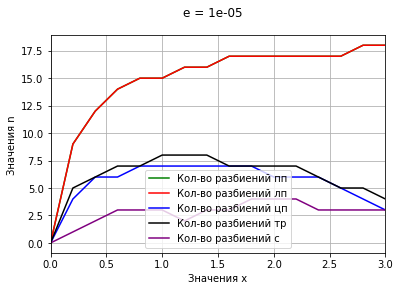

In [14]:
np.log2(df['Кол-во разбиений пп']).plot.line(color = 'green', legend = True)
np.log2(df['Кол-во разбиений лп']).plot.line(color = 'red', legend = True)
np.log2(df['Кол-во разбиений цп']).plot.line(color = 'blue', legend = True)
np.log2(df['Кол-во разбиений тр']).plot.line(color = 'black', legend = True)
np.log2(df['Кол-во разбиений с']).plot.line(color = 'purple', legend = True)
plt.ylabel('Значения n')
plt.xlabel('Значения x')
plt.suptitle('e = '+str(eps))
plt.grid(True)
plt.show()

In [ ]:
a = 0
b = 3
number_of_steps = 10
eps = 0.0001
step = (b - a)/number_of_steps
X = []
for x in np.arange(a, b + step,step):   
    X.append(round(x, 2))

val_right = []
n_right = []
val_left = []
n_left = []
val_center = []
n_center = []
val_trapeze = []
n_trapeze = []
val_simpson = []
n_simpson = []

for x in X:
    val, n = right(x, eps)
    val_right.append(val)
    n_right.append(n)
    
    val, n = left(x, eps)
    val_left.append(val)
    n_left.append(n)
    
    val, n = center(x, eps)
    val_center.append(val)
    n_center.append(n)
    
    val, n = trap(x, eps)
    val_trapeze.append(val)
    n_trapeze.append(n)
    
    val, n = simpson(x, eps)
    val_simpson.append(val)
    n_simpson.append(n)

d = {'val_right':val_right, "n_right": n_right,
      'val_left':val_left, "n_left": n_left,
      'val_center':val_center, "n_center": n_center,
      'val_trapeze':val_trapeze, "n_trapeze": n_trapeze,
      'val_simpson':val_simpson, "n_simpson": n_simpson}

df = pd.DataFrame(d, index=X)

df

np.log2(df['n_right']).plot.line(color = 'green', legend = True)
np.log2(df['n_left']).plot.line(color = 'red', legend = True)
np.log2(df['n_center']).plot.line(color = 'blue', legend = True)
np.log2(df['n_trapeze']).plot.line(color = 'black', legend = True)
np.log2(df['n_simpson']).plot.line(color = 'purple', legend = True)
plt.ylabel('Значения n')
plt.xlabel('Значения x')
plt.suptitle('e = '+str(eps))
plt.grid(True)
plt.show()

In [ ]:
a = 0
b = 3
number_of_steps = 10
eps = 0.00001
step = (b - a)/number_of_steps
X = []
for x in np.arange(a, b + step,step):   
    X.append(round(x, 2))

val_right = []
n_right = []
val_left = []
n_left = []
val_center = []
n_center = []
val_trapeze = []
n_trapeze = []
val_simpson = []
n_simpson = []

for x in X:
    val, n = right(x, eps)
    val_right.append(val)
    n_right.append(n)
    
    val, n = left(x, eps)
    val_left.append(val)
    n_left.append(n)
    
    val, n = center(x, eps)
    val_center.append(val)
    n_center.append(n)
    
    val, n = trap(x, eps)
    val_trapeze.append(val)
    n_trapeze.append(n)
    
    val, n = simpson(x, eps)
    val_simpson.append(val)
    n_simpson.append(n)

d = {'val_right':val_right, "n_right": n_right,
      'val_left':val_left, "n_left": n_left,
      'val_center':val_center, "n_center": n_center,
      'val_trapeze':val_trapeze, "n_trapeze": n_trapeze,
      'val_simpson':val_simpson, "n_simpson": n_simpson}

df = pd.DataFrame(d, index=X)

df

np.log2(df['n_right']).plot.line(color = 'green', legend = True)
np.log2(df['n_left']).plot.line(color = 'red', legend = True)
np.log2(df['n_center']).plot.line(color = 'blue', legend = True)
np.log2(df['n_trapeze']).plot.line(color = 'black', legend = True)
np.log2(df['n_simpson']).plot.line(color = 'purple', legend = True)
plt.ylabel('Значения n')
plt.xlabel('Значения x')
plt.suptitle('e = '+str(eps))
plt.grid(True)
plt.show()

Функция отображающая зависимость значения интеграла от x при разных eps

In [ ]:
df['val_right'].plot.line(color = 'green', legend = True)
df['val_left'].plot.line(color = 'red', legend = True)
df['val_center'].plot.line(color = 'blue', legend = True)
df['val_trapeze'].plot.line(color = 'black', legend = True)
df['val_simpson'].plot.line(color = 'purple', legend = True)
plt.ylabel('Значения интеграла')
plt.xlabel('Значения x')
plt.suptitle('e = '+str(eps))
plt.grid(True)
plt.show()

In [ ]:
df['val_right'].plot.line(color = 'green', legend = True)
df['val_left'].plot.line(color = 'red', legend = True)
df['val_center'].plot.line(color = 'blue', legend = True)
df['val_trapeze'].plot.line(color = 'black', legend = True)
df['val_simpson'].plot.line(color = 'purple', legend = True)
plt.ylabel('Значения интеграла')
plt.xlabel('Значения x')
plt.suptitle('e = '+str(eps))
plt.grid(True)
plt.show()

# 3.1 задание
### Приближённое вычисление интегралов
### Метод Гаусса

In [15]:
i1 = (1 - 1 / np.sqrt(3)) / 2
i2 = (1 + 1 / np.sqrt(3)) / 2

def gauss(x, eps):
    n = 1
    s0 = 0
    s1 = (fi(x * i1) + fi(x * i2)) / 2
    while np.absolute(s1 - s0) >= eps:
        n *= 2
        s0 = s1
        s1 = 0
        z = 0
        h = x / n
        for i in range(n):
            s1 += h * (fi(z + h * i1) + fi(z + h * i2)) / 2
            z += h
    return s0 * 2 / np.sqrt(np.pi), n

In [16]:
print("Значение интеграла и количество итераций: ", gauss(3,0.01))

Значение интеграла и количество итераций:  (1.0059745042024912, 4)


In [17]:
val_gauss=[]
n_gauss=[]
eps = 0.00001
for x in X:
    val, n=gauss(x,eps)
    val_gauss.append(val)
    n_gauss.append(n)
df1 = pd.DataFrame({'Знач. Гаусс':val_gauss, "Кол-во разбиений г": n_gauss}, index=X)
df2 = pd.concat([df, df1], axis=1)

In [18]:
df2.to_excel('i.xlsx')
df2

,Знач.Прав.прямоуг,Кол-во разбиений пп,Знач.Лев.прямоуг,Кол-во разбиений лп,Знач.Центр.прямоуг,Кол-во разбиений цп,Знач. Трапец.,Кол-во разбиений тр,Знач. Симпсона,Кол-во разбиений с,Знач. Гаусс,Кол-во разбиений г
0.0,0.000000,1,0.000000,1,0.000000,1,0.000000,1,0.000000,1,0.000000,4
0.2,0.222685,512,0.222720,512,0.222714,16,0.222697,32,0.222704,2,0.222703,4
0.4,0.428376,4096,0.428409,4096,0.428397,64,0.428382,64,0.428395,4,0.428391,4
0.6,0.603844,16384,0.603869,16384,0.603870,64,0.603849,128,0.603857,8,0.603848,4
0.8,0.742088,32768,0.742114,32768,0.742107,128,0.742089,128,0.742103,8,0.742100,8
1.0,0.842679,32768,0.842723,32768,0.842709,128,0.842697,256,0.842703,8,0.842699,8
1.2,0.910298,65536,0.910330,65536,0.910323,128,0.910309,256,0.910313,4,0.910315,4
1.4,0.952264,65536,0.952306,65536,0.952294,128,0.952281,256,0.952281,8,0.952288,8
1.6,0.976336,131072,0.976361,131072,0.976356,128,0.976334,128,0.976337,8,0.976356,8
1.8,0.989076,131072,0.989105,131072,0.989096,128,0.989080,128,0.989090,16,0.989101,8


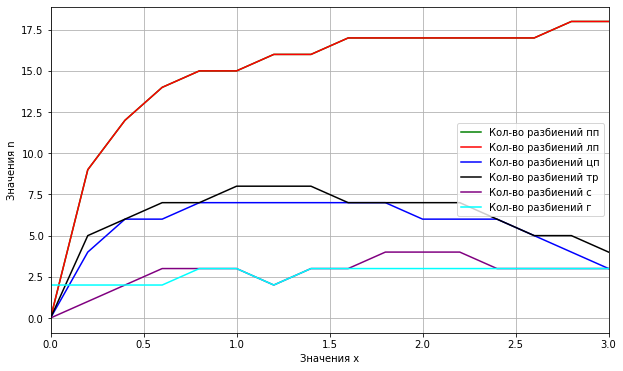

In [19]:
plt.figure(figsize=(10,6)) 
np.log2(df['Кол-во разбиений пп']).plot.line(color = 'green', legend = True)
np.log2(df['Кол-во разбиений лп']).plot.line(color = 'red', legend = True)
np.log2(df['Кол-во разбиений цп']).plot.line(color = 'blue', legend = True)
np.log2(df['Кол-во разбиений тр']).plot.line(color = 'black', legend = True)
np.log2(df['Кол-во разбиений с']).plot.line(color = 'purple', legend = True)
np.log2(df2['Кол-во разбиений г']).plot.line(color = 'cyan', legend = True)
plt.ylabel('Значения n')
plt.xlabel('Значения x')
plt.grid(True)
plt.show()

# 4 задание

## Метод хорд

In [20]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

eps = 0.0001
b = 2
n= 20
iter = []
buf = simpson(b, eps)[0]
F_list = []
for i in range(0, n + 1):
    F_list.append(i / n * buf)
    iter.append(0)

def F(z, i):
    return simpson(z, eps)[0] - F_list[i]

Xi_list = []
for i in range(0, n + 1, 1):
    Xi_list.append(i / n * 2)

Z_list = [0]
for i in range(1, n + 1):
    Z0 = Xi_list[i - 1]
    ZK = Xi_list[n - i]
    while(abs(F(ZK, i)) > eps):
        iter[i] += 1
        ZK = (Z0 * F(ZK, i) - ZK * F(Z0, i)) / (F(ZK, i)-F(Z0, i))
    Z_list.append(ZK)


In [32]:
for i in range(0, n + 1):
    print( F_list[i], ':', Z_list[i])
    
dataset = {"erf":F_list,"erf-1":Z_list}
df4 = pd.DataFrame(dataset)
df4
df4.to_excel('i.xlsx')

0.0 : 0
0.04976521729751665 : 0.04413204498934549
0.0995304345950333 : 0.08845025853928723
0.14929565189254992 : 0.13308431181542718
0.1990608691900666 : 0.17820551956238018
0.24882608648758323 : 0.22423411672361987
0.29859130378509985 : 0.27120740742691224
0.3483565210826165 : 0.3191898381900194
0.3981217383801332 : 0.3688987907217214
0.4478869556776498 : 0.42036845215313595
0.49765217297516645 : 0.47413942785379243
0.5474173902726831 : 0.5312115149303839
0.5971826075701997 : 0.5914375732854796
0.6469478248677164 : 0.6565478888032991
0.696713042165233 : 0.7277698315950443
0.7464782594627497 : 0.8074678952711594
0.7962434767602664 : 0.8987761863837421
0.8460086940577829 : 1.007726564423383
0.8957739113552996 : 1.148495516764287
0.9455391286528162 : 1.3607294566443524
0.9953043459503329 : 1.9970470534643563


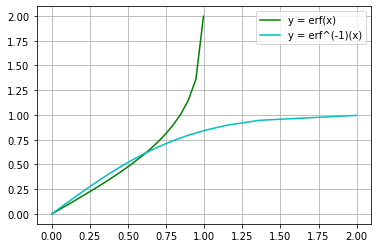

In [37]:
plt.plot(F_list, Z_list, label = 'y = erf(x)', color = 'g')
plt.plot(Z_list, F_list, label = 'y = erf^(-1)(x)', color = 'c')
plt.grid(True)
plt.legend()
plt.show()

## Метод секущих

In [44]:
eps = 0.0001
b = 2
n= 20
buf = simpson(b, eps)[0]
F_list = []
for i in range(0,n+1):
    F_list.append(i/n*buf)
    
def F(z, i):
    return simpson(z, eps)[0] - F_list[i]

Xi_list = []
for i in range(n + 1):
    Xi_list.append(i / n * 2)
Fi_list = ERF(Xi_list, eps)

Z_list = [0]
for i in range(1, n+1):
    Z1 = Xi_list[i-1]
    Z2 = Xi_list[i]
    while(abs(F(Z2, i)) > eps):
        buf = Z2
        Z2 = Z2 - (Z2 - Z1) *F (Z2, i) / (F(Z2, i) - F(Z1, i))
        Z1 = buf
    Z_list.append(Z2)

print(n)
for i in range(0, n + 1):
    print( F_list[i], ':', Z_list[i])
    
dataset = {"erf":F_list,"erf-1":Z_list}
df4 = pd.DataFrame(dataset)
df4
df4.to_excel('i.xlsx')

plt.plot(F_list, Z_list, label = 'y = erf(x)', color = 'g')
plt.plot(Z_list, F_list, label = 'y = erf^(-1)(x)', color = 'c')
plt.grid(True)
plt.legend()
plt.show()

20
0.0 : 0
0.04976521729751665 : 0.04413149317416049
0.0995304345950333 : 0.08843889991952346
0.14929565189254992 : 0.13316676407179248
0.1990608691900666 : 0.17828406753332404
0.24882608648758323 : 0.22422236195082645
0.29859130378509985 : 0.2711584752118504
0.3483565210826165 : 0.319230746335342
0.3981217383801332 : 0.3688653051376352
0.4478869556776498 : 0.42035005366419304
0.49765217297516645 : 0.4742380414303139
0.5474173902726831 : 0.5311188109777578
0.5971826075701997 : 0.5916254576648309
0.6469478248677164 : 0.6566604046128256
0.696713042165233 : 0.7279269119508893
0.7464782594627497 : 0.8073444541189484
0.7962434767602664 : 0.8984876223506236
0.8460086940577829 : 1.0079733224466492
0.8957739113552996 : 1.1491130345719558
0.9455391286528162 : 1.360314923712115
0.9953043459503329 : 2.0


PermissionError: [Errno 13] Permission denied: 'i.xlsx'

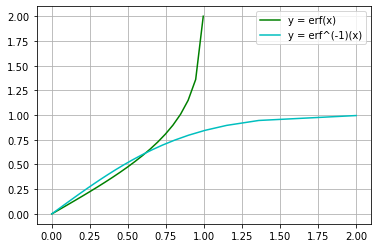

In [45]:
plt.plot(F_list, Z_list, label = 'y = erf(x)', color = 'g')
plt.plot(Z_list, F_list, label = 'y = erf^(-1)(x)', color = 'c')
plt.grid(True)
plt.legend()
plt.show()